In [1]:
# A small programme to
import requests
import networkx as nx
import itertools
import xmltodict
import pandas as pd
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


In [2]:
def search_all(term,start,stop):
    r = requests.get('http://export.arxiv.org/api/query?search_query=all:{}&start={}&max_results={}'.format(term,start,stop))
    return xmltodict.parse(r.text)

In [3]:
def search_author(author,start,stop):
    r = requests.get('http://export.arxiv.org/api/query?search_query=au:{}&start={}&max_results={}'.format(author,start,stop))
    return xmltodict.parse(r.text)

In [4]:
def get_author_list(temp):
    list_of_authors_grouped = []
    list_of_authors = []
    for entry in temp['feed']['entry']:
        temp2 = []
        for author in entry['author']:
            if type(author) is not unicode:
                temp2.append(author['name'])
                list_of_authors.append(author['name'])
        list_of_authors_grouped.append(temp2)
    return [list_of_authors,list_of_authors_grouped]    

In [5]:
def get_author_list(temp):
    list_of_authors_grouped = []
    list_of_authors = []
    if 'entry' not in temp['feed'].keys():
        return
    if type(temp['feed']['entry']) == list:
        for entry in temp['feed']['entry']:
            temp2 = []
            for author in entry['author']:
                if type(author) is not unicode:
                    temp2.append(author['name'])
                    list_of_authors.append(author['name'])
            list_of_authors_grouped.append(temp2)
    else:
        list_of_authors_grouped.extend(temp['feed']['entry']['author'])
        list_of_authors.append(temp['feed']['entry']['author'])
    return [list_of_authors,list_of_authors_grouped]    

In [6]:
def network_generation(list_of_authors):
    for element in list_of_authors:
        if len(element) > 0:
            #print(element)
            for i in element:
                G.add_node(i)
            a = list(itertools.combinations(element,2))
            for i in a:
                G.add_edge(*i)



In [49]:
#Initial seed
G = nx.Graph()
a = search_all('Graphene',0,100)

author_list = get_author_list(a)
#loop

for i in author_list[0]:
    b = search_author(i,'0','100')
    b = get_author_list(b)
    if type(b) != type(None):
        network_generation(b[1])
    


#b = get_author_list(a)

#network_generation(b[1])



In [17]:
type(b['feed']['entry'])

TypeError: list indices must be integers or slices, not str

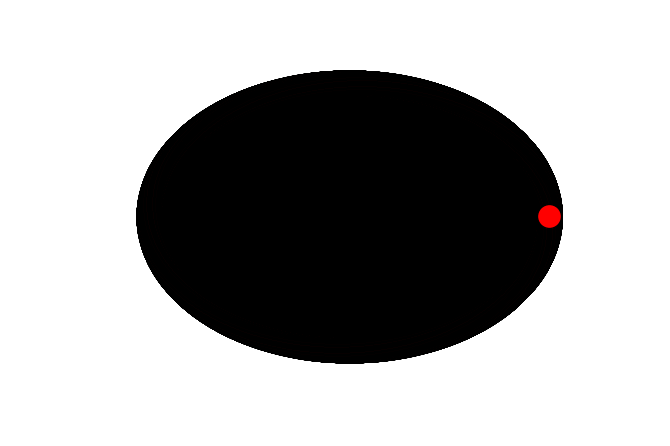

In [18]:
nx.draw(G,pos=nx.nx.circular_layout(G))

In [ ]:
type(a['feed']['entry'])

In [ ]:
b['feed']['entry']['author']

In [ ]:
x = ['a','b','c','d']
y = []
y.extend(x)

In [ ]:
y

In [50]:
len(G.node)

58278

In [30]:
b['feed'].keys()

odict_keys(['@xmlns', 'link', 'title', 'id', 'updated', 'opensearch:totalResults', 'opensearch:startIndex', 'opensearch:itemsPerPage'])

In [31]:
b['feed']['title']

OrderedDict([('@type', 'html'),
             ('#text',
              'ArXiv Query: search_query=au:Zoltán Osváth&id_list=&start=0&max_results=100')])

In [33]:
x = {'one':1, 'two':2, 'three':3}

In [34]:
x

{'one': 1, 'three': 3, 'two': 2}

In [38]:
'one' not in x.keys()

False

In [47]:
type(b) == type(None)

True

In [46]:
a

NoneType

In [52]:
len(G.nodes())

58278

In [53]:
G

In [58]:
from networkx.readwrite import json_graph
import json

In [56]:
data = json_graph.node_link_data(G)

In [57]:
data

{'directed': False,
 'graph': {},
 'links': [{'source': 0, 'target': 6528},
  {'source': 0, 'target': 31426},
  {'source': 0, 'target': 42247},
  {'source': 0, 'target': 14888},
  {'source': 0, 'target': 11735},
  {'source': 0, 'target': 1575},
  {'source': 0, 'target': 38404},
  {'source': 0, 'target': 7952},
  {'source': 0, 'target': 26584},
  {'source': 0, 'target': 47232},
  {'source': 0, 'target': 49526},
  {'source': 0, 'target': 57141},
  {'source': 0, 'target': 45650},
  {'source': 0, 'target': 50448},
  {'source': 0, 'target': 36438},
  {'source': 0, 'target': 14095},
  {'source': 0, 'target': 26363},
  {'source': 0, 'target': 33664},
  {'source': 0, 'target': 10262},
  {'source': 0, 'target': 11714},
  {'source': 0, 'target': 35671},
  {'source': 0, 'target': 19406},
  {'source': 0, 'target': 11508},
  {'source': 0, 'target': 15951},
  {'source': 0, 'target': 16625},
  {'source': 0, 'target': 57150},
  {'source': 0, 'target': 3681},
  {'source': 0, 'target': 43023},
  {'sourc

In [59]:
test = json.dumps(data)

In [63]:
with open('test_arxiv.json','w') as f:
    json.dump(test,f)

In [64]:
!open .

In [65]:
nx.write_gml(G,'test_arxiv.gml')

In [68]:
G.nodes()

['P. Hallen',
 'Arash Amini',
 'Ville Havu',
 'M. Bondi',
 'Renaud Lambiotte',
 'D. Wölbing',
 'Susan Hermiller',
 'P. Mukherjee',
 'D. Burton',
 'F. Naderi',
 'W. Brodowski',
 'Peter J. Cho',
 'E. Louis',
 'Mehdi Bennis',
 'Annie Baglin',
 'P. Shawhan',
 'J. Trummer',
 'H. Hoorani',
 'S. M. M. Coelho',
 'C. L. Gao',
 'J. Borkowski',
 'T. Kajita',
 'L. P. Teo',
 'Hsin-Ying Chiu',
 'Y. Sakai',
 'Daniela Rebuzzi',
 'S. Roman Lopez',
 'S. Reid',
 'Amiel Sternberg',
 'A K Rajagopal',
 'L. A. Winslow',
 'R. Ganter',
 'M. Sakamoto',
 'Z. Patrick',
 'P. G. Kuijer',
 'S. E. Haaland',
 'Tanmoy Das',
 'T. Junk',
 'L. Singer',
 'J. von Delft',
 'Sotiris A. Sanidas',
 'G. Penso',
 'Sofia Ribeiro',
 'R. Smiljanic',
 'H. Htoon',
 'M. Tselengidou',
 'K. V. Gopalakrishnan',
 'Volkmar Liebscher',
 'V. Vassilieva',
 'D. N. Basov',
 'Ronan M. T. Fleming',
 'E. Vercellin',
 'Linli Xu',
 'G. Vansuch',
 'Wushan Cheng',
 'S. Shett',
 'G. Matt',
 'Zhi Lin',
 'A. Kovacs',
 'J. J. Ishikawa',
 'M. Viola',
 'T. Y

In [71]:
with open('test_axriv_2.json','w') as f:
    json.dump(G.nodes(),f)

In [ ]:
search_